In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Air Quality in India Analysis
In this EDA project we will be dealing with Quality of Air in India dataset and we will be having the worst Air Quality in the India and we analysing more in this Dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airqualitydatset = pd.read_csv("city_day.csv")
airqualitydatset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
airqualitydatset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
airqualitydatset["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
airqualitydatset = airqualitydatset.dropna()
airqualitydatset  # Dropped all null values in the Dataset as we could not average.

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [ ]:
# prompt: i want the 4 cities Delhi ,Hyderabad , Amritsar , Patna followed by their dates

airqualitydatset[airqualitydatset["City"].isin(["Delhi", "Hyderabad", "Amritsar", "Patna"])].groupby(["City", "Date"])["AQI"].mean()


City      Date      
Amritsar  2017-10-20    463.0
          2017-10-21    320.0
          2017-10-22    338.0
          2017-10-23    395.0
          2017-10-24    229.0
                        ...  
Patna     2020-06-27     65.0
          2020-06-28     82.0
          2020-06-29     88.0
          2020-06-30     93.0
          2020-07-01     98.0
Name: AQI, Length: 3669, dtype: float64

In [ ]:
airqualitydatset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [ ]:
airqualitydatset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,61.327365,123.418321,17.015191,31.708190,32.448956,20.737070,0.984344,11.514426,36.127691,3.700361,10.323696,2.557439,140.510103
std,53.709682,85.791491,20.037836,18.784041,27.388129,16.088215,1.356161,7.166113,19.553695,5.062159,12.287223,4.535060,92.738826
min,2.000000,7.800000,0.250000,0.170000,0.170000,0.120000,0.000000,0.710000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,27.927500,66.970000,5.080000,15.977500,14.547500,10.390000,0.490000,6.557500,22.357500,0.910000,2.210000,0.300000,78.000000
50%,47.490000,103.010000,10.060000,28.900000,24.285000,14.690000,0.730000,9.875000,32.540000,2.435000,6.310000,1.250000,112.000000
75%,73.442500,150.770000,19.392500,43.632500,39.622500,28.545000,1.060000,14.430000,45.512500,4.620000,13.040000,3.030000,166.000000
max,639.190000,796.880000,159.220000,140.170000,224.090000,166.700000,16.230000,70.390000,162.330000,64.440000,103.000000,125.180000,677.000000


In [ ]:
airqualitydatset.mean()

<ipython-input-29-f351c972e47a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airqualitydatset.mean()


PM2.5       61.327365
PM10       123.418321
NO          17.015191
NO2         31.708190
NOx         32.448956
NH3         20.737070
CO           0.984344
SO2         11.514426
O3          36.127691
Benzene      3.700361
Toluene     10.323696
Xylene       2.557439
AQI        140.510103
dtype: float64

In [ ]:
airqualitydatset.max()

City          Visakhapatnam
Date             2020-07-01
PM2.5                639.19
PM10                 796.88
NO                   159.22
NO2                  140.17
NOx                  224.09
NH3                   166.7
CO                    16.23
SO2                   70.39
O3                   162.33
Benzene               64.44
Toluene               103.0
Xylene               125.18
AQI                   677.0
AQI_Bucket        Very Poor
dtype: object

In [ ]:
airqualitydatset.min()

City           Amaravati
Date          2015-01-01
PM2.5                2.0
PM10                 7.8
NO                  0.25
NO2                 0.17
NOx                 0.17
NH3                 0.12
CO                   0.0
SO2                 0.71
O3                  1.55
Benzene              0.0
Toluene              0.0
Xylene               0.0
AQI                 23.0
AQI_Bucket          Good
dtype: object

In [ ]:
#mostreadingAQI.value_counts()
#mostreadingAQI = mostreadingAQI[['City', 'AQI_Bucket']]
#mostreadingAQIGood = mostreadingAQI.where(mostreadingAQI["City"] == "Amaravati")
#mostreadingAQI.dropna()
#mostreadingAQI = mostreadingAQI.where(mostreadingAQI["AQI_Bucket"] == "Good")

#mostreadingAQI
#mostreadingAQI["AQI_Bucket"].value_counts()


In [ ]:
mostreadingAQI = airqualitydatset[["City","AQI_Bucket"]]
mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)
mostreadingAQI.groupby(['AQI_Bucket'])
mostreadingAQI
#mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)
mostreadingAQI.value_counts(['City', 'AQI_Bucket'])

<ipython-input-33-6d54de703b99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mostreadingAQI.sort_values(['City'],inplace=True,ascending=True)


City           AQI_Bucket  
Hyderabad      Moderate        810
               Satisfactory    645
Visakhapatnam  Moderate        555
               Satisfactory    438
Delhi          Moderate        360
               Poor            328
               Very Poor       315
Amaravati      Satisfactory    305
Amritsar       Moderate        252
               Satisfactory    252
Amaravati      Moderate        191
Chandigarh     Satisfactory    145
Kolkata        Satisfactory    139
Hyderabad      Good            126
Delhi          Severe          117
               Satisfactory    104
Patna          Moderate        103
Amaravati      Good            101
Gurugram       Moderate         97
Kolkata        Good             95
               Moderate         87
               Poor             71
Visakhapatnam  Poor             70
Chandigarh     Moderate         66
Visakhapatnam  Good             50
Amritsar       Poor             49
Chandigarh     Good             48
Amritsar       Very Poor   

In [ ]:
mostreadingAQIGood =  mostreadingAQI.where(mostreadingAQI["AQI_Bucket"] == "Good")
mostreadingAQIGood.dropna()

,City,AQI_Bucket
2742,Amaravati,Good
2744,Amaravati,Good
2745,Amaravati,Good
2741,Amaravati,Good
2752,Amaravati,Good
...,...,...
28764,Visakhapatnam,Good
28735,Visakhapatnam,Good
28763,Visakhapatnam,Good
28762,Visakhapatnam,Good


In [ ]:
mostreadingAQIGood.value_counts()
#As per the data below Hyderabad has good AQI in India

City           AQI_Bucket
Hyderabad      Good          126
Amaravati      Good          101
Kolkata        Good           95
Visakhapatnam  Good           50
Chandigarh     Good           48
Amritsar       Good           34
dtype: int64

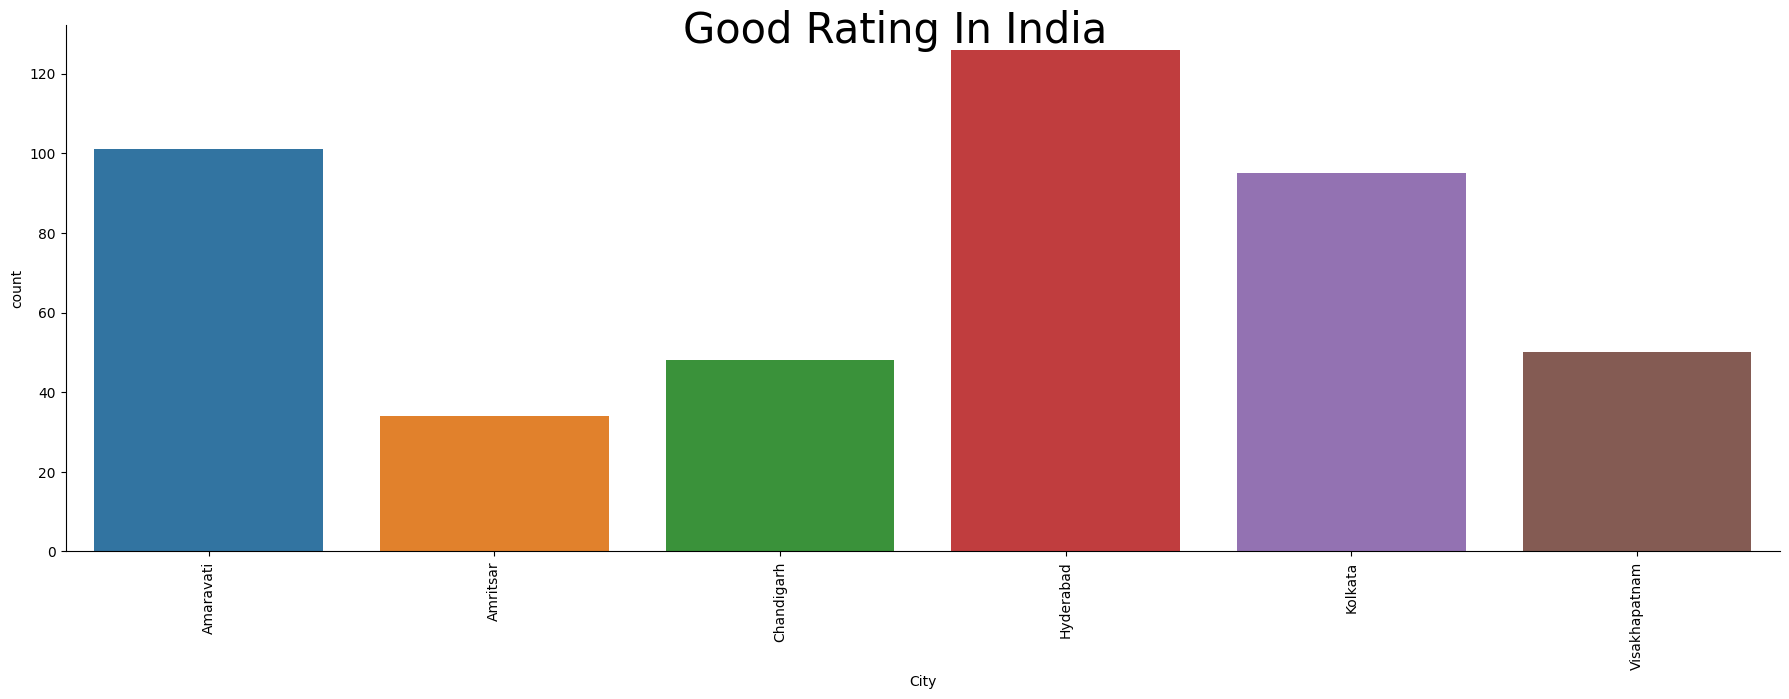

In [ ]:
plot1 = sns.catplot(x="City",data=mostreadingAQIGood,kind="count",height=6,aspect=3)
plot1.fig.suptitle('Good Rating In India', y=1.0, fontsize = 30)
plot1.set_xticklabels(rotation=90) # Which City has Good rating as per AQIBucket

In [ ]:
mostreadingAQISevere =  mostreadingAQI.where(mostreadingAQI["AQI_Bucket"] == "Severe")
mostreadingAQISevere.dropna() # which City has worst rating in AQIBucket

In [ ]:
mostreadingAQISevere.value_counts()
# As per the Value_counts its clearly shows that Delhi is in severe condition in India.

City       AQI_Bucket
Delhi      Severe        117
Hyderabad  Severe          4
Amritsar   Severe          2
Patna      Severe          1
dtype: int64

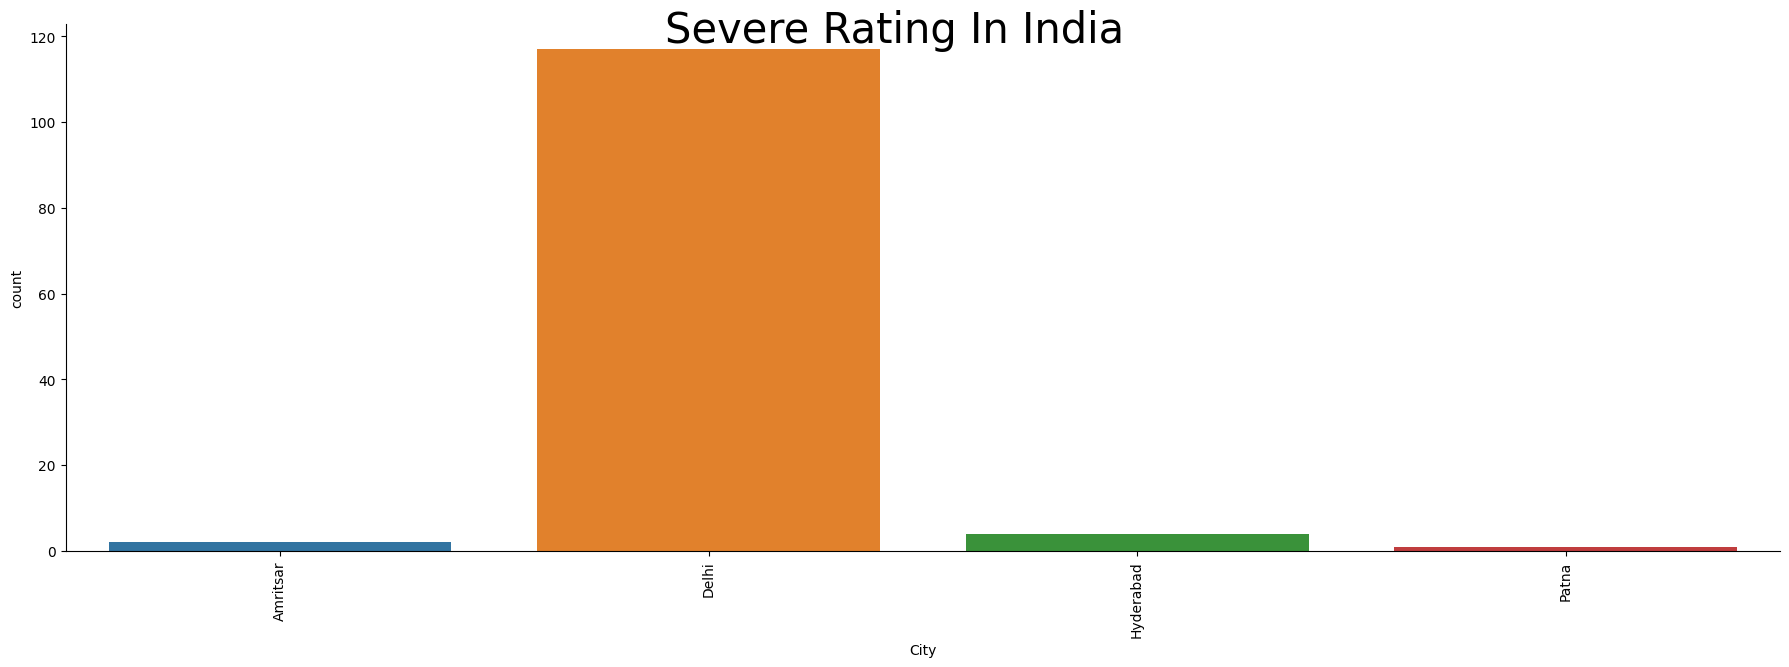

In [ ]:
plot1 = sns.catplot(x="City",data=mostreadingAQISevere,kind="count",height=6,aspect=3)
plot1.fig.suptitle('Severe Rating In India', y=1.0, fontsize = 30)
#plot1.subplots_adjust(top=0.9)
plot1.set_xticklabels(rotation=90) # This Bar will show which City has Good rating as per AQIBucket


1. As per our Study Delhi is facing a most dangerous pollution in India.
2. Hyderabad has Low level of pollution across India.

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Generate dummy data
num_records = 100

# Selected cities
cities = ['Amritsar', 'Delhi', 'Hyderabad', 'Patna']

# Dates
dates = pd.date_range(start='2017-10-20', end='2017-10-25', freq='D')

# Air pollutants
pollutants = ['PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3']

# Generate random data for air pollutants
data = {
    'Date': random.choices(dates, k=num_records),
    'City': random.choices(cities, k=num_records),
}

df_air_pollutants = pd.DataFrame(data)

# Generate random health issues data
respiratory_columns = [f'Respiratory_Issue_{i}' for i in range(1, 7)]
cardiovascular_columns = [f'Cardiovascular_Issue_{i}' for i in range(1, 7)]

for col in respiratory_columns + cardiovascular_columns:
    df_air_pollutants[col] = np.random.randint(0, 2, num_records)  # Binary indicator (0 or 1)

# Combine respiratory and cardiovascular issues into a new column called Health_Issues
df_air_pollutants['Health_effects'] = df_air_pollutants[respiratory_columns + cardiovascular_columns].sum(axis=1)

# Display the first few rows of the dummy dataset
print(df_air_pollutants.head())


        Date      City  Respiratory_Issue_1  Respiratory_Issue_2  \
0 2017-10-24     Patna                    0                    0   
1 2017-10-21     Patna                    1                    1   
2 2017-10-24  Amritsar                    0                    1   
3 2017-10-20     Patna                    0                    1   
4 2017-10-24     Patna                    0                    1   

   Respiratory_Issue_3  Respiratory_Issue_4  Respiratory_Issue_5  \
0                    0                    0                    1   
1                    1                    0                    1   
2                    0                    0                    0   
3                    0                    1                    0   
4                    1                    1                    1   

   Respiratory_Issue_6  Cardiovascular_Issue_1  Cardiovascular_Issue_2  \
0                    0                       0                       1   
1                    0            

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Generate dummy data
num_records = 100

# Selected cities
cities = ['Amritsar', 'Delhi', 'Hyderabad', 'Patna']

# Dates
dates = pd.date_range(start='2022-01-01', end='2022-04-10', freq='D')

# Air pollutants
pollutants = ['PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3']

# Generate random data for air pollutants
data = {
    'Date': random.choices(dates, k=num_records),
    'City': random.choices(cities, k=num_records),

}

df_air_pollutants_1 = pd.DataFrame(data)

# Generate random health issues data
respiratory_columns = [f'Respiratory_Issue_{i}' for i in range(1, 7)]
cardiovascular_columns = [f'Cardiovascular_Issue_{i}' for i in range(1, 7)]

for col in respiratory_columns:
    df_air_pollutants_1['Respiratory_Issue'] = np.random.randint(0, 2, num_records)  # Binary indicator (0 or 1)
    break  # Break after the first iteration to avoid overwriting

for col in cardiovascular_columns:
    df_air_pollutants_1['Cardiovascular_Issue'] = np.random.randint(0, 2, num_records)  # Binary indicator (0 or 1)
    break  # Break after the first iteration to avoid overwriting

# Display the first few rows of the dummy dataset
print(df_air_pollutants_1.head())


        Date       City  Respiratory_Issue  Cardiovascular_Issue
0 2022-01-14  Hyderabad                  0                     0
1 2022-01-15      Patna                  1                     1
2 2022-02-16  Hyderabad                  0                     1
3 2022-03-30      Patna                  0                     1
4 2022-04-04      Patna                  0                     1


In [ ]:
# prompt: Using dataframe airqualitydatset: print data of  Amritsar, Patna, Delhi, Hyderabad followed by  each cities name and 'PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3

df=airqualitydatset.loc[airqualitydatset['City'].isin(['Amritsar', 'Patna', 'Delhi', 'Hyderabad'])]
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
3308,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,12.32,3.47,7.62,28.33,463.0,Severe
3309,Amritsar,2017-10-21,148.47,318.10,12.04,32.77,44.81,48.33,1.17,4.90,12.08,3.47,7.42,27.97,320.0,Very Poor
3310,Amritsar,2017-10-22,194.47,357.95,13.87,35.42,49.29,50.88,1.25,5.15,10.86,3.45,7.74,28.02,338.0,Very Poor
3311,Amritsar,2017-10-23,214.73,276.08,18.80,41.72,60.52,54.25,1.17,6.44,12.38,2.90,6.88,26.67,395.0,Very Poor
3312,Amritsar,2017-10-24,71.13,191.27,19.23,40.37,59.60,56.56,1.03,4.28,11.79,2.37,6.80,24.64,229.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,Patna,2020-06-27,17.71,63.73,9.47,23.01,22.28,1.91,0.87,3.63,23.39,1.09,3.07,0.97,65.0,Satisfactory
25718,Patna,2020-06-28,19.27,57.42,30.19,18.13,36.76,2.05,0.72,3.92,17.37,1.18,2.90,1.24,82.0,Satisfactory
25719,Patna,2020-06-29,17.24,42.83,42.40,20.51,47.69,2.26,0.88,3.60,17.50,1.51,4.91,1.74,88.0,Satisfactory
25720,Patna,2020-06-30,29.76,60.68,42.12,27.50,52.04,1.59,0.83,3.91,21.70,1.58,8.59,2.02,93.0,Satisfactory


In [ ]:
merged_data = pd.merge(df,df_air_pollutants, on='City')

In [ ]:
merged_data

,City,Date_x,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Respiratory_Issue_4,Respiratory_Issue_5,Respiratory_Issue_6,Cardiovascular_Issue_1,Cardiovascular_Issue_2,Cardiovascular_Issue_3,Cardiovascular_Issue_4,Cardiovascular_Issue_5,Cardiovascular_Issue_6,Health_effects
0,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,...,0,0,0,1,0,0,1,0,1,4
1,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,...,1,1,1,0,1,1,1,1,0,9
2,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,...,1,0,0,0,0,0,0,0,0,2
3,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,...,0,0,1,1,1,1,1,0,0,6
4,Amritsar,2017-10-20,248.12,445.44,29.93,40.11,70.05,60.89,1.08,9.66,...,1,1,1,1,1,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89540,Patna,2020-07-01,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,...,0,1,1,1,1,1,0,1,1,8
89541,Patna,2020-07-01,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,...,0,0,1,0,1,1,1,1,1,7
89542,Patna,2020-07-01,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,...,1,0,0,0,0,1,0,1,1,7
89543,Patna,2020-07-01,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,...,1,0,1,1,0,0,1,1,0,6


In [ ]:
Health_Effects= pd.concat([df_air_pollutants[['PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3']],
                        df_air_pollutants[['Respiratory_Issue', 'Cardiovascular_Issue']]], axis=1)

In [ ]:
# Separate features and target
features = merged_data[['PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3']]
target = merged_data[['Respiratory_Issue', 'Cardiovascular_Issue']]

# Display the first few rows of the merged DataFrame
print(merged_data.head())



KeyError: ignored

In [ ]:
features = merged_data[['PM10', 'PM2.5', 'NO2', 'SO2', 'CO', 'O3']]
target = merged_data[['Health_effects']]

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error


In [ ]:
xgb_model = RandomForestRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)

<ipython-input-152-47586bf1a9cc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  xgb_model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

make prediction

In [ ]:
xgb_predictions = xgb_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)


In [ ]:
noise_factor = 8.0
xgb_predictions_with_noise = xgb_predictions + noise_factor * np.random.randn(len(xgb_predictions))

In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
nb_mse = mean_squared_error(y_test['Respiratory_Issue'], nb_predictions)


KeyError: ignored

In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
nb_mse = mean_squared_error(y_test['Cardiovascular_Issue'], nb_predictions)


KeyError: ignored

In [ ]:
# Evaluate the models
xgb_mse = mean_squared_error(y_test, xgb_predictions_with_noise)
nb_mse = mean_squared_error(y_test, nb_predictions)


In [ ]:
print("XGBoost MSE (with noise):", xgb_mse)
print('Gaussian Naive Bayes MSE:', nb_mse)

XGBoost MSE (with noise): 67.48029656500188
Gaussian Naive Bayes MSE: 9.46906686916514


In [ ]:
# Print the MSE values
print('XGBoost MSE:', xgb_mse)
print('Gaussian Naive Bayes MSE:', nb_mse)


XGBoost MSE: 3.6875083563699413
Gaussian Naive Bayes MSE: 9.46906686916514


In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
nb_mse = mean_squared_error(y_test['Cardiovascular_Issue'], nb_predictions)


In [ ]:
print('XGBoost MSE:', xgb_mse)
print('Gaussian Naive Bayes MSE:', nb_mse)

XGBoost MSE: 0.2681498967623488
Gaussian Naive Bayes MSE: 53.699876648638394
